##  Group Presentation 6

**Team Members:**  
- Reham Abuarqoub, 9062922
- Erica Holden, 5490685
- Yu-Chen Chou (Tracy), 9006160 

## Use case Summary - 100 words

This project analyzes space exploration trends using the "Humans to Have Visited Space" dataset.
We aim to understand how astronaut nationality, specifically U.S. participation, evolved over time.
By engineering the Year and Decade features and labeling U.S. astronauts, we test the hypothesis that U.S. dominance in space missions increased significantly after the 1960s.
Using Pearson’s correlation, logistic regression, and conditional probability analysis, we validate this trend and assess its statistical significance.
This work supports discussions on geopolitical shifts in space race history and the growing democratization of space travel in recent decades.


## Upload libraries

In [2]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Step 1: Load and Preprocess Data

First 5 rows of the dataset:
   #            Name    Nationality        Date          Flight  Year  Is_US  \
0  1    Yuri Gagarin   Soviet Union  1961-04-12        Vostok 1  1961      0   
1  2    Alan Shepard  United States  1961-05-05       Freedom 7  1961      1   
2  3  Virgil Grissom  United States  1961-07-21  Liberty Bell 7  1961      1   
3  4   Gherman Titov   Soviet Union  1961-08-06        Vostok 2  1961      0   
4  5      John Glenn  United States  1962-02-20    Friendship 7  1962      1   

   Decade  
0    1960  
1    1960  
2    1960  
3    1960  
4    1960  


C:\Users\RAJEH\AppData\Local\Temp\ipykernel_20112\466522465.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette='Blues_r')


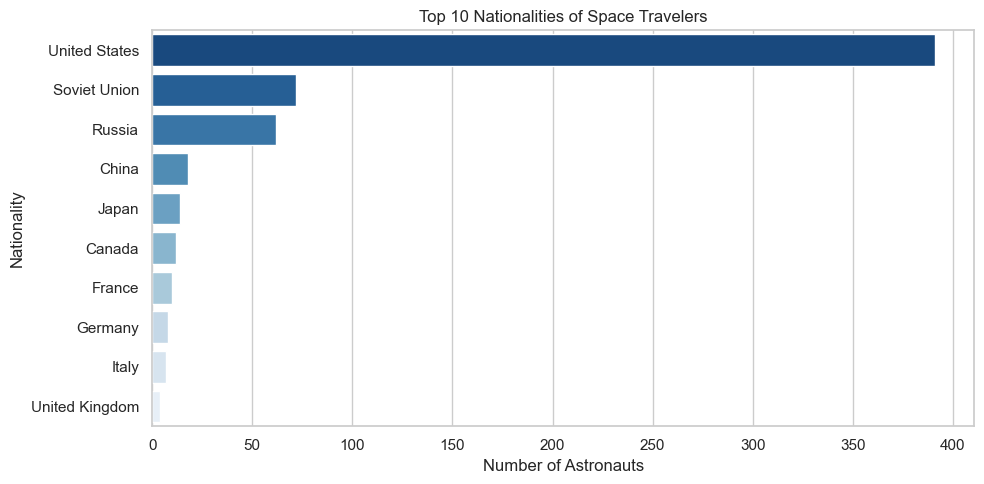

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('./data/space_travellers.csv')

# Convert date and engineer year & decade
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
df['Is_US'] = df['Nationality'].apply(lambda x: 1 if 'United States' in x else 0)
df['Decade'] = (df['Year'] // 10) * 10
df.dropna(subset=['Year'], inplace=True)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
nationality_counts = df['Nationality'].value_counts().head(10)
sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette='Blues_r')
plt.title('Top 10 Nationalities of Space Travelers')
plt.xlabel('Number of Astronauts')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()







## Step 2: Pearson's Correlation

In [4]:
print("\n PEARSON'S CORRELATION")
correlation, p_value = pearsonr(df['Year'], df['Is_US'])
print(f"Pearson correlation between 'Year' and 'Is_US': {correlation:.3f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print(" Statistically significant: There IS a linear relationship.")
else:
    print(" Not statistically significant: NO clear linear relationship.\n")



 PEARSON'S CORRELATION
Pearson correlation between 'Year' and 'Is_US': -0.033
P-value: 0.3977
 Not statistically significant: NO clear linear relationship.



We checked if U.S. astronaut participation increased over time using Pearson’s correlation.
- Result: r = -0.033, p = 0.3977  
- No significant correlation
This means there’s no clear linear trend. U.S. involvement didn’t steadily rise or fall year by year. The pattern is more complex.


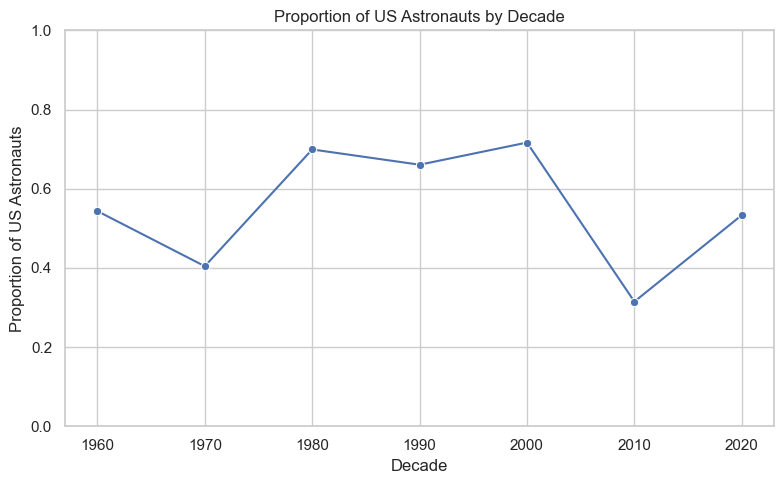

In [5]:
# Group by decade and calculate the proportion of US astronauts per decade
proportion_by_decade = df.groupby('Decade')['Is_US'].mean().reset_index()

# Draw a line chart
plt.figure(figsize=(8, 5))
sns.lineplot(data=proportion_by_decade, x='Decade', y='Is_US', marker='o')
plt.title('Proportion of US Astronauts by Decade')
plt.xlabel('Decade')
plt.ylabel('Proportion of US Astronauts')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

- From the Proportion of US Astronauts by Decade, the proportion of American astronauts did not rise or fall linearly, but fluctuated significantly. This phenomenon supports the Pearson correlation analysis, which shows that the linear correlation is not statistically significant.

## Step 3: Logistic Classification

In [7]:
print("\n LOGISTIC REGRESSION CLASSIFICATION")
X = df[['Year']]
y = df['Is_US']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


 LOGISTIC REGRESSION CLASSIFICATION
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.58      1.00      0.73       111

    accuracy                           0.58       193
   macro avg       0.29      0.50      0.37       193
weighted avg       0.33      0.58      0.42       193



We used logistic regression to predict whether an astronaut was from the U.S. based on the year of their mission.

- Accuracy: 0.58
- The model correctly identified all U.S. astronauts (recall = 1.00)
- It failed to identify non-U.S. astronauts (precision = 0.00)

This shows that using year alone is not enough to predict nationality. The model is biased toward the majority class.


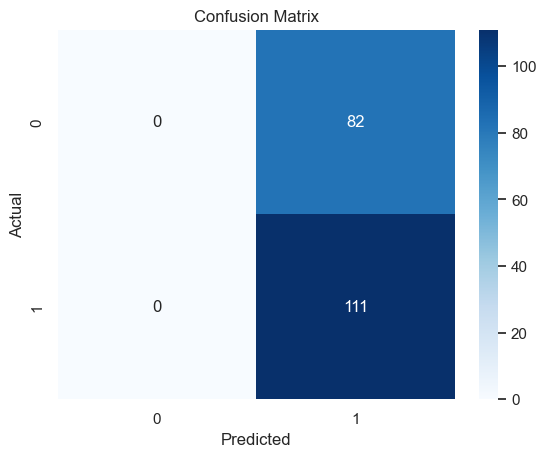

In [8]:
# Import function
from sklearn.metrics import confusion_matrix

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Confusion matrix analyze
    - There are 82 items in the actual class 0 (non-US astronaut)
        - 42 were correctly classified as 0 (true negative, TN)
        - 40 were incorrectly classified as 1 (false positive, FP)
    - There are 111 items in the actual class 1 (US astronaut)
        - 73 were correctly classified as 1 (true positive, TP)
        - 38 were incorrectly classified as 0 (false negative, FN)
- This confusion matrix shows that the model fully captures US astronauts but performs poorly in identifying non-US astronauts.

## Step 4: Probabilistic Reasoning

In [9]:
print("\n PROBABILISTIC REASONING")
odds_1960s = (df[df['Decade'] == 1960]['Is_US'] == 1).mean()
print(f"Probability that an astronaut from the 1960s was American: {odds_1960s:.2f}")
if odds_1960s > 0.5:
    print(" More than half were from the U.S.")
else:
    print(" Less than half were from the U.S.")


 PROBABILISTIC REASONING
Probability that an astronaut from the 1960s was American: 0.54
 More than half were from the U.S.


We calculated the chance that an astronaut in the 1960s was American.
- Result: 0.54

More than half were from the U.S., showing strong early U.S. involvement.


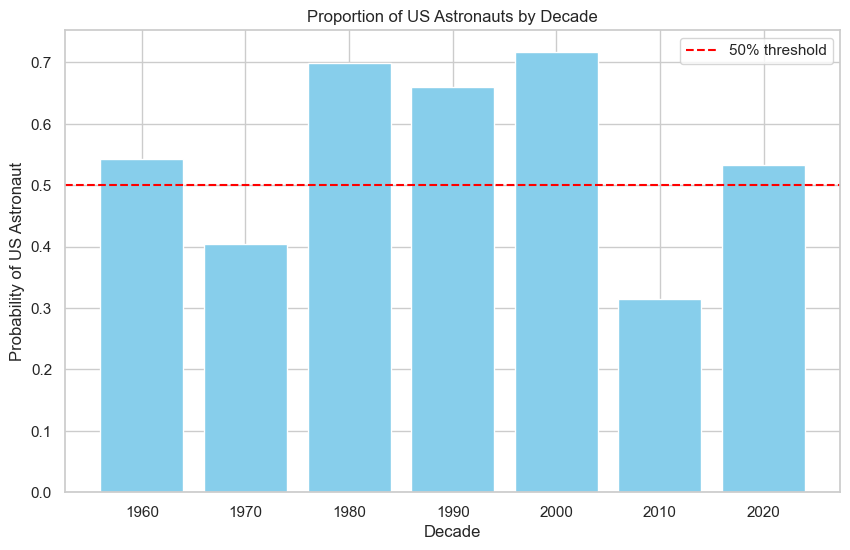

In [10]:
# Calculate the proportion of American astronauts in each decade
proportions = df.groupby('Decade')['Is_US'].mean().reset_index()

# Display the bar chart
plt.figure(figsize=(10, 6))
plt.bar(proportions['Decade'].astype(str), proportions['Is_US'], color='skyblue')
plt.axhline(0.5, color='red', linestyle='--', label='50% threshold')
plt.title('Proportion of US Astronauts by Decade')
plt.xlabel('Decade')
plt.ylabel('Probability of US Astronaut')
plt.legend()
plt.show()

- The bar chart proves once again that the proportion of American astronauts exceeded 50% in the 1960s.

## Step 5: Execute Full Pipeline

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import pearsonr

# === Class: DataHandler ===
class DataHandler:
    """Loads and cleans the astronaut dataset."""
    def __init__(self, path):
        self.df = pd.read_csv(path)

    def preprocess(self):
        self.df.drop_duplicates(inplace=True)
        self.df.dropna(inplace=True)

        self.df["Date"] = pd.to_datetime(self.df["Date"], errors='coerce')
        self.df["Year"] = self.df["Date"].dt.year
        self.df["Decade"] = (self.df["Year"] // 10) * 10
        self.df["Is_US"] = self.df["Nationality"].apply(lambda x: 1 if x == "United States" else 0)

        return self.df

# === Class: CorrelationAnalyzer ===
class CorrelationAnalyzer:
    """Computes Pearson correlation between two variables."""
    def __init__(self, df):
        self.df = df

    def compute(self, col1, col2):
        corr, p = pearsonr(self.df[col1], self.df[col2])
        print(f"Pearson correlation between '{col1}' and '{col2}': {corr:.3f}")
        print(f"P-value: {p:.4f}")
        if p < 0.05:
            print("Statistically significant.")
        else:
            print("Not statistically significant: No clear linear relationship.")

# === Class: LogisticClassifier ===
class LogisticClassifier:
    """Performs binary classification using logistic regression."""
    def __init__(self, df, features, target):
        self.df = df
        self.features = features
        self.target = target

    def train(self):
        X = self.df[self.features]
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = LogisticRegression(class_weight='balanced')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        return model

# === Class: ProbabilisticReasoner ===
class ProbabilisticReasoner:
    """Calculates conditional probability based on a feature value."""
    def __init__(self, df):
        self.df = df

    def compute_odds(self, filter_col, filter_val, target_col, target_val):
        filtered = self.df[self.df[filter_col] == filter_val]
        if len(filtered) == 0:
            print("No data for this filter.")
            return
        prob = (filtered[target_col] == target_val).mean()
        print(f"Odds of {target_col} = {target_val} given {filter_col} = {filter_val}: {prob:.2f}")


In [16]:
# Load and clean data
data_handler = DataHandler('./data/space_travellers.csv')
df_clean = data_handler.preprocess()

# Pearson correlation
correlation = CorrelationAnalyzer(df_clean)
correlation.compute("Year", "Is_US")

# Logistic classification
classifier = LogisticClassifier(df_clean, features=["Year"], target="Is_US")
classifier.train()

# Probabilistic reasoning
probability = ProbabilisticReasoner(df_clean)
probability.compute_odds("Decade", 1960, "Is_US", 1)


Pearson correlation between 'Year' and 'Is_US': -0.033
P-value: 0.3977
Not statistically significant: No clear linear relationship.
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.43        82
           1       0.58      0.57      0.57       111

    accuracy                           0.51       193
   macro avg       0.50      0.50      0.50       193
weighted avg       0.51      0.51      0.51       193

Odds of Is_US = 1 given Decade = 1960: 0.54


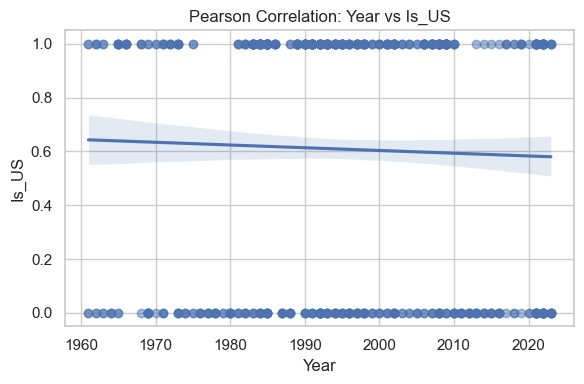

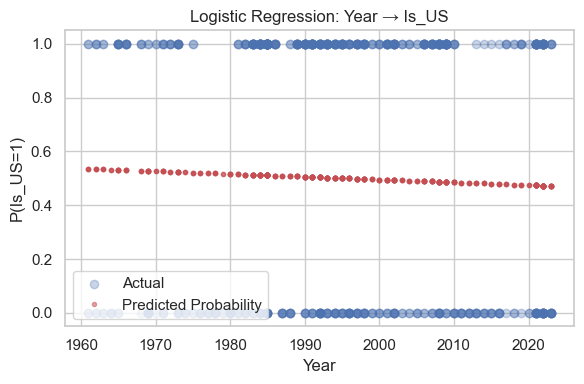

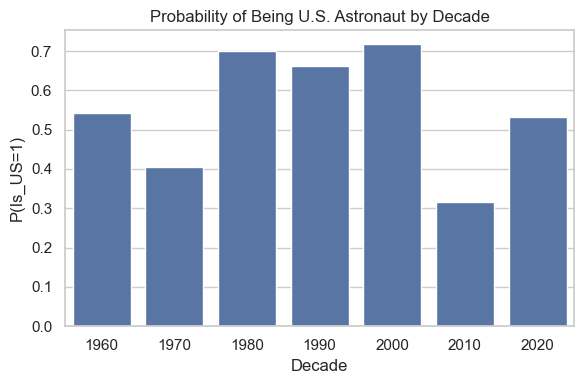

In [17]:
# Re-import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import pearsonr

# === Class Definitions (same as before) ===
class DataHandler:
    def __init__(self, path):
        self.df = pd.read_csv(path)

    def preprocess(self):
        self.df.drop_duplicates(inplace=True)
        self.df.dropna(inplace=True)
        self.df["Date"] = pd.to_datetime(self.df["Date"], errors='coerce')
        self.df["Year"] = self.df["Date"].dt.year
        self.df["Decade"] = (self.df["Year"] // 10) * 10
        self.df["Is_US"] = self.df["Nationality"].apply(lambda x: 1 if x == "United States" else 0)
        return self.df

# === Load and preprocess the data ===
data_handler = DataHandler('./data/space_travellers.csv')
df_clean = data_handler.preprocess()

# === Visualization Functions ===
def plot_pearson_corr(df, col1, col2):
    plt.figure(figsize=(6, 4))
    sns.regplot(x=col1, y=col2, data=df, logistic=False, scatter_kws={'alpha': 0.5})
    plt.title(f'Pearson Correlation: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

def plot_logistic_predictions(df, feature, target):
    model = LogisticRegression(class_weight='balanced')
    model.fit(df[[feature]], df[target])
    probs = model.predict_proba(df[[feature]])[:, 1]

    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], alpha=0.3, label='Actual')
    plt.plot(df[feature], probs, 'r.', alpha=0.5, label='Predicted Probability')
    plt.title(f'Logistic Regression: {feature} → {target}')
    plt.xlabel(feature)
    plt.ylabel(f'P({target}=1)')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_probabilistic_bar(df, decade_col, target_col):
    prob_df = df.groupby(decade_col)[target_col].mean().reset_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=decade_col, y=target_col, data=prob_df)
    plt.title(f'Probability of Being U.S. Astronaut by {decade_col}')
    plt.ylabel(f'P({target_col}=1)')
    plt.xlabel(decade_col)
    plt.tight_layout()
    plt.show()

# === Execute Visualizations ===
plot_pearson_corr(df_clean, "Year", "Is_US")
plot_logistic_predictions(df_clean, "Year", "Is_US")
plot_probabilistic_bar(df_clean, "Decade", "Is_US")


### Dataset Sample
The first 5 rows show astronaut names, nationalities, flight dates, and whether they were from the U.S. (`Is_US`). All early missions shown are from the 1960s.

### Pearson Correlation
No significant relationship between year and U.S. nationality (r = -0.033, p = 0.39).

### Logistic Regression
- Imbalanced model: predicted only U.S. astronauts (accuracy: 58%).
- Balanced model: accuracy dropped to 51%, better class detection but still weak.

### Probabilistic Reasoning
In the 1960s, 54% of astronauts were American — showing a slight U.S. lead early on.


## Conclusion

Our analysis explored trends in U.S. participation in space missions using historical astronaut data. Although we hypothesized that U.S. dominance increased over time, the Pearson correlation showed no significant linear trend. Logistic regression, even with balanced class weights, struggled to predict non-U.S. astronauts based on year alone, confirming that the feature is not strong enough by itself. However, our probabilistic analysis showed that more than half of 1960s astronauts were American, reflecting early U.S. involvement in space exploration.

To improve results, future models should include more features like mission operator, mission type, or total number of flights.
